# UniRef90 Kingdom Plantae Analysis

##### The below analysis was conducted utilizing a filter to extract plant hosts from the cleaned UniRef90 sequences and following the pre-processing steps. Through importing necessary libraries and using NCBI taxonomy database, plots were generated to visualize distributions of the plant hosts and associated viruses.

### Importing dependencies and loading csv files

In [1]:
# import appropriate directories for analysis
import pandas as pd
import os
from ete3 import NCBITaxa
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec
import numpy as np

file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90_viridae_embl_hosts_pruned_metadata_species_plants_w_seq_kingdom_class.csv")
df = pd.read_csv(file_path)
df

,uniref90_id,tax_id,embl_ref_id,embl_host_name,virus_host_name,virus_name,virus_taxon_rank,virus_host_tax_id,virus_host_taxon_rank,seq,Code,Name,kingdom,LineageTaxIDs,Rank,FullLineage,FullLineageTaxIDs,FullLineageRanks,class
0,UniRef90_Q8B320,219596,AUZ62356.1,['Malvastrum coromandelianum'],Malvastrum coromandelianum,Tobacco curly shoot betasatellite,species,108453,species,MTIKYNNKKGMEFIVDVKLKEDNSIVVQIELISTKSPALAKRKYII...,108453,Malvastrum coromandelianum,Viridiplantae,33090,species,cellular organisms;Eukaryota;Viridiplantae;Str...,131567;2759;33090;35493;131221;3193;58023;7853...,cellular root;domain;kingdom;phylum;subphylum;...,Magnoliopsida
1,UniRef90_A0A023HRI2,12167,AGQ16883.1,['Solanum tuberosum'],Solanum tuberosum,Potato virus M,species,4113,species,MGDSTKKAETAKDVGTSQEKREARPLPTAAEFEDDDNPGNVNVREA...,4113,Solanum tuberosum,Viridiplantae,33090,species,cellular organisms;Eukaryota;Viridiplantae;Str...,131567;2759;33090;35493;131221;3193;58023;7853...,cellular root;domain;kingdom;phylum;subphylum;...,Magnoliopsida
2,UniRef90_Q8B333,12224,CAD37266.1,['Saccharum hybrid cultivar'],Saccharum hybrid cultivar,Sugarcane mosaic virus,species,128810,species,DAGAQGGGGNAGTQPPATGAAAQGGAQPPTTGAAAQPPATQGSQPP...,128810,Saccharum hybrid cultivar,Viridiplantae,33090,species,cellular organisms;Eukaryota;Viridiplantae;Str...,131567;2759;33090;35493;131221;3193;58023;7853...,cellular root;domain;kingdom;phylum;subphylum;...,Magnoliopsida
3,UniRef90_A0A023I4L6,47985,AGT29895.1,['Vitis vinifera'],Vitis vinifera,Grapevine leafroll-associated virus 1,species,29760,species,SLRPSRPSTGQRSGDSEVARREMGDKLKRTFNIAEIFTNPEMNIIF...,29760,Vitis vinifera,Viridiplantae,33090,species,cellular organisms;Eukaryota;Viridiplantae;Str...,131567;2759;33090;35493;131221;3193;58023;7853...,cellular root;domain;kingdom;phylum;subphylum;...,Magnoliopsida
4,UniRef90_Q8B337,12224,CAD37262.1,['Saccharum hybrid cultivar'],Saccharum hybrid cultivar,Sugarcane mosaic virus,species,128810,species,DAGAQGGGGNAGTQPPATGAAAQGGAQPPATGAAAQPPAAQPTGGA...,128810,Saccharum hybrid cultivar,Viridiplantae,33090,species,cellular organisms;Eukaryota;Viridiplantae;Str...,131567;2759;33090;35493;131221;3193;58023;7853...,cellular root;domain;kingdom;phylum;subphylum;...,Magnoliopsida
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7266,UniRef90_L0APS0,1264880,AFZ77097.1,['Sida ciliaris'],Sida ciliaris,Sida ciliaris golden mosaic virus,species,108361,species,MYIIRNKRGSSSTQRRYYPRNSVSNRSTISRRHDFKRRAGYGSKPT...,108361,Sida ciliaris,Viridiplantae,33090,species,cellular organisms;Eukaryota;Viridiplantae;Str...,131567;2759;33090;35493;131221;3193;58023;7853...,cellular root;domain;kingdom;phylum;subphylum;...,Magnoliopsida
7267,UniRef90_L0AQM1,1264880,AFZ77095.1,['Sida ciliaris'],Sida ciliaris,Sida ciliaris golden mosaic virus,species,108361,species,MKMVSLISMYLSSSRANTGARIADSSIWSPQPGQHISIQTYRELNP...,108361,Sida ciliaris,Viridiplantae,33090,species,cellular organisms;Eukaryota;Viridiplantae;Str...,131567;2759;33090;35493;131221;3193;58023;7853...,cellular root;domain;kingdom;phylum;subphylum;...,Magnoliopsida
7268,UniRef90_L0ARA2,1264880,AFZ77093.1,['Sida ciliaris'],Sida ciliaris,Sida ciliaris golden mosaic virus,species,108361,species,MRSSSPSQPPSIKKAHRRAKRRAIRRRRIDLQCGCSIYFHIDCTGH...,108361,Sida ciliaris,Viridiplantae,33090,species,cellular organisms;Eukaryota;Viridiplantae;Str...,131567;2759;33090;35493;131221;3193;58023;7853...,cellular root;domain;kingdom;phylum;subphylum;...,Magnoliopsida
7269,UniRef90_A0A146KUN7,12305,CEO86970.1,['Citrullus lanatus'],Citrullus lanatus,Cucumber mosaic virus,species,3654,species,RPRRGSRSAPSSADANFRVLSQQLSRLNKTLAAGRPTINHPTFVGS...,3654,Citrullus lanatus,Viridiplantae,33090,species,cellular organisms;Eukaryota;Viridiplantae;Str...,131567;2759;33090;35493;131221;3193;58023;7853...,cellular root;domain;kingdom;phylum;subphylum;...,Magnoliopsida


In [38]:
file_path = os.path.join(os.getcwd(), "..", "..", "..","..", "input/data/uniref90_viridae_embl_hosts_pruned_metadata_species_nonvertebrates_w_seq.csv")
inv_df = pd.read_csv(file_path)
inv_df.head()

,uniref90_id,tax_id,embl_ref_id,embl_host_name,virus_host_name,virus_name,virus_taxon_rank,virus_host_tax_id,virus_host_taxon_rank,seq
0,UniRef90_Q8B320,219596,AUZ62356.1,['Malvastrum coromandelianum'],Malvastrum coromandelianum,Tobacco curly shoot betasatellite,species,108453,species,MTIKYNNKKGMEFIVDVKLKEDNSIVVQIELISTKSPALAKRKYII...
1,UniRef90_A0A023HRI2,12167,AGQ16883.1,['Solanum tuberosum'],Solanum tuberosum,Potato virus M,species,4113,species,MGDSTKKAETAKDVGTSQEKREARPLPTAAEFEDDDNPGNVNVREA...
2,UniRef90_Q8B333,12224,CAD37266.1,['Saccharum hybrid cultivar'],Saccharum hybrid cultivar,Sugarcane mosaic virus,species,128810,species,DAGAQGGGGNAGTQPPATGAAAQGGAQPPTTGAAAQPPATQGSQPP...
3,UniRef90_A0A023I4L6,47985,AGT29895.1,['Vitis vinifera'],Vitis vinifera,Grapevine leafroll-associated virus 1,species,29760,species,SLRPSRPSTGQRSGDSEVARREMGDKLKRTFNIAEIFTNPEMNIIF...
4,UniRef90_Q8B337,12224,CAD37262.1,['Saccharum hybrid cultivar'],Saccharum hybrid cultivar,Sugarcane mosaic virus,species,128810,species,DAGAQGGGGNAGTQPPATGAAAQGGAQPPATGAAAQPPAAQPTGGA...


### Host Distributions

In [3]:
# define a function to retrieve information from data for the pie chart
def get_data_for_pie_chart(df, col_name, n, threshold):
    count_data = df[col_name].value_counts().to_dict()

    label_data = {}
    prevalence_data = {}
    for k, v in count_data.items():
        prevalence = v/n*100
        prevalence_data[k] = f"{k} ({prevalence:.2f}%)"
        if prevalence <= threshold:
            prevalence_data[k] = f"{k} ({prevalence:.3f}%)"
            label_data[k] = ""
        else:
            label_data[k] = k
    return count_data, label_data, prevalence_data

def get_label(pct, threshold):
    if pct <= threshold:
        return ""
    else:
        return f"{pct:.2f}%"

In [4]:
kingdom_count_data, kingdom_label_data, kingdom_prevalence_data = get_data_for_pie_chart(df, "kingdom", df.shape[0], threshold=0.5)

In [5]:
class_count_data, class_label_data, class_prevalence_data = get_data_for_pie_chart(df, "class", df.shape[0], threshold=0.5)

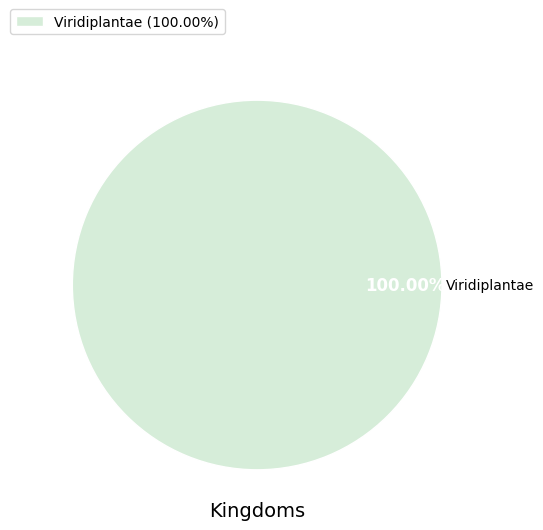

In [6]:
fig, ax = plt.subplots(figsize=(6, 6))

threshold=0.5
wedges, texts, autotexts = ax.pie(kingdom_count_data.values(), labels=list(kingdom_label_data.values()), autopct=lambda pct: get_label(pct, threshold), 
                                  pctdistance=.8, startangle=-180, labeldistance=1.02, counterclock=False,
                                  colors=sns.cubehelix_palette(rot=-.4, gamma=.7, n_colors=len(kingdom_label_data), reverse=True), 
                                  wedgeprops={"linewidth": 1, "edgecolor": "white"})

ax.legend(wedges, kingdom_prevalence_data.values(),
          title="",
          loc="center left",
          bbox_to_anchor=(-.05, 1.07), ncol=2)
plt.setp(autotexts, size=12, weight="bold", color="white")
ax.set_title("Kingdoms", fontsize=14, y=0, pad=0)
plt.show()

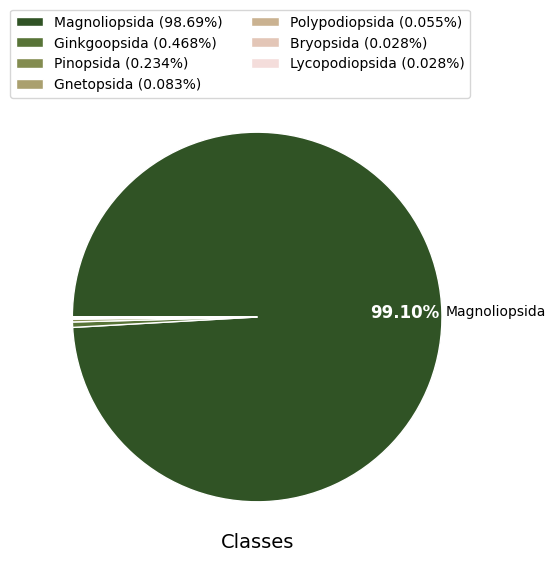

In [7]:
fig, ax = plt.subplots(figsize=(6, 6))

threshold=0.5
wedges, texts, autotexts = ax.pie(class_count_data.values(), labels=list(class_label_data.values()), autopct=lambda pct: get_label(pct, threshold), 
                                  pctdistance=.8, startangle=-180, labeldistance=1.02, counterclock=False,
                                  colors=sns.cubehelix_palette(start=2, rot=-.4, gamma=.7, n_colors=len(class_label_data), reverse=True), 
                                  wedgeprops={"linewidth": 1, "edgecolor": "white"})

ax.legend(wedges, class_prevalence_data.values(),
          title="",
          loc="center left",
          bbox_to_anchor=(-.05, 1.07), ncol=2)
plt.setp(autotexts, size=12, weight="bold", color="white")
ax.set_title("Classes", fontsize=14, y=0, pad=0)
plt.show()

The above pie charts shows the distribution of host kingdoms and classes. The kingdom distribution pie chart affirms that our data is properly filtered to include only plant hosts. The class distribution pie chart shows that the overarching majority of the plants in these data are from the Magnoliopsida class.

In [8]:
vir_count_data, vir_label_data, vir_prevalence_data = get_data_for_pie_chart(df, "virus_name", df.shape[0], threshold=0.5)

### Viral Protein Sequence Length

In [9]:
# determine the length of each viral protein sequence using a list comprehension
seq_len_plant = [len(seq) for seq in df['seq']]
max(seq_len_plant)

7803

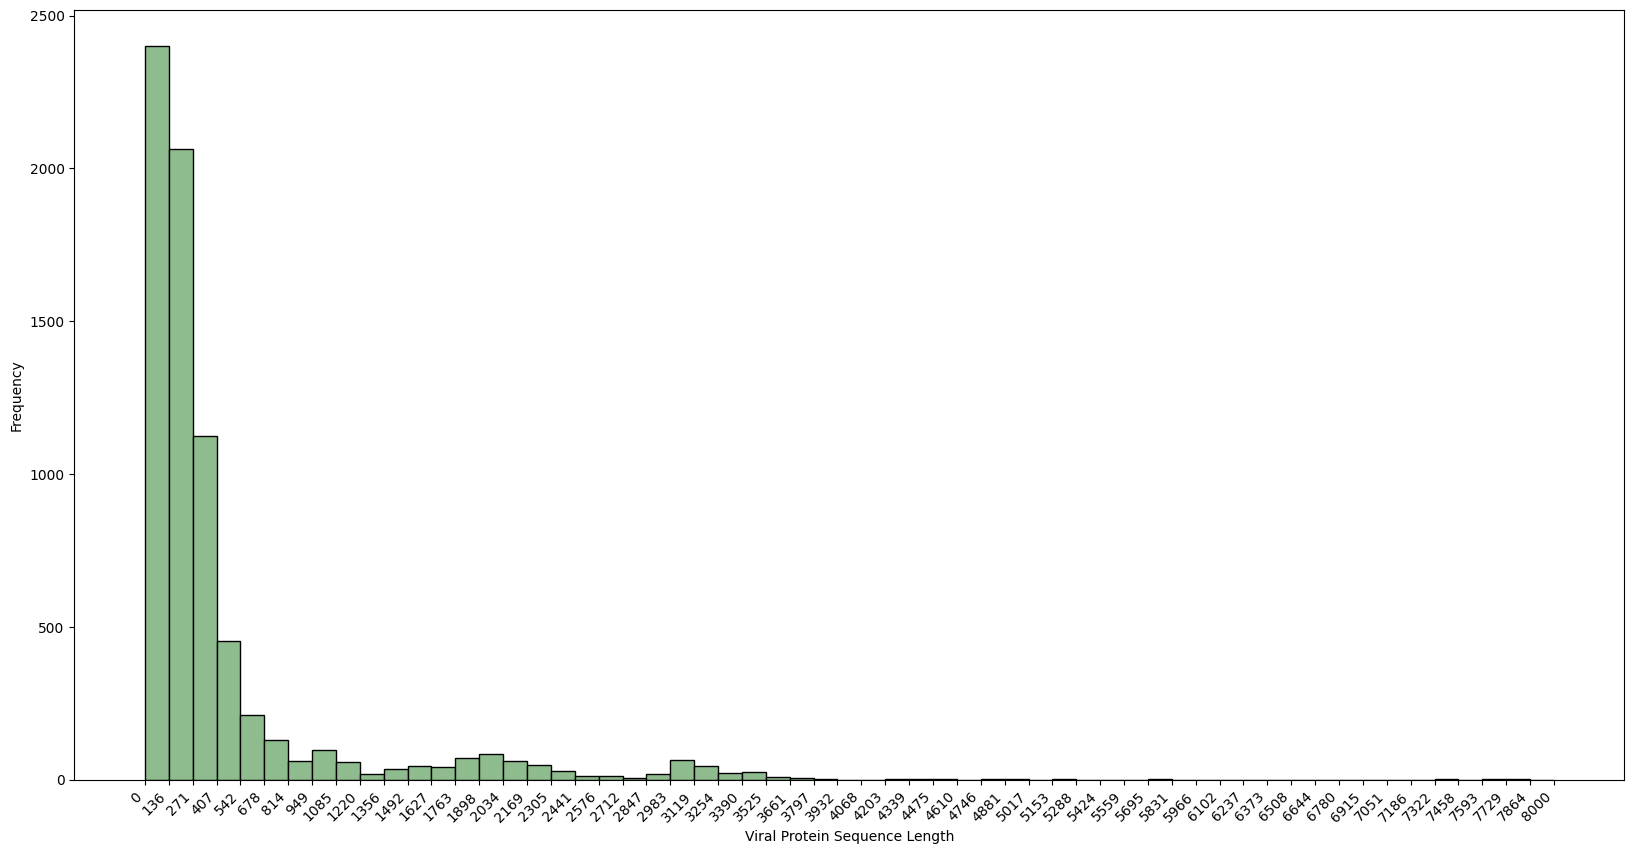

In [10]:
# plot a histogram given equally spaced intervals
bins = np.linspace(0, 8000, 60)
plt.figure(figsize=(20, 10))
plt.hist(seq_len_plant, bins=bins, edgecolor='black', color='darkseagreen')
plt.xlabel('Viral Protein Sequence Length')
plt.ylabel('Frequency')
plt.xticks(bins, ha='right', rotation=45)
plt.show()

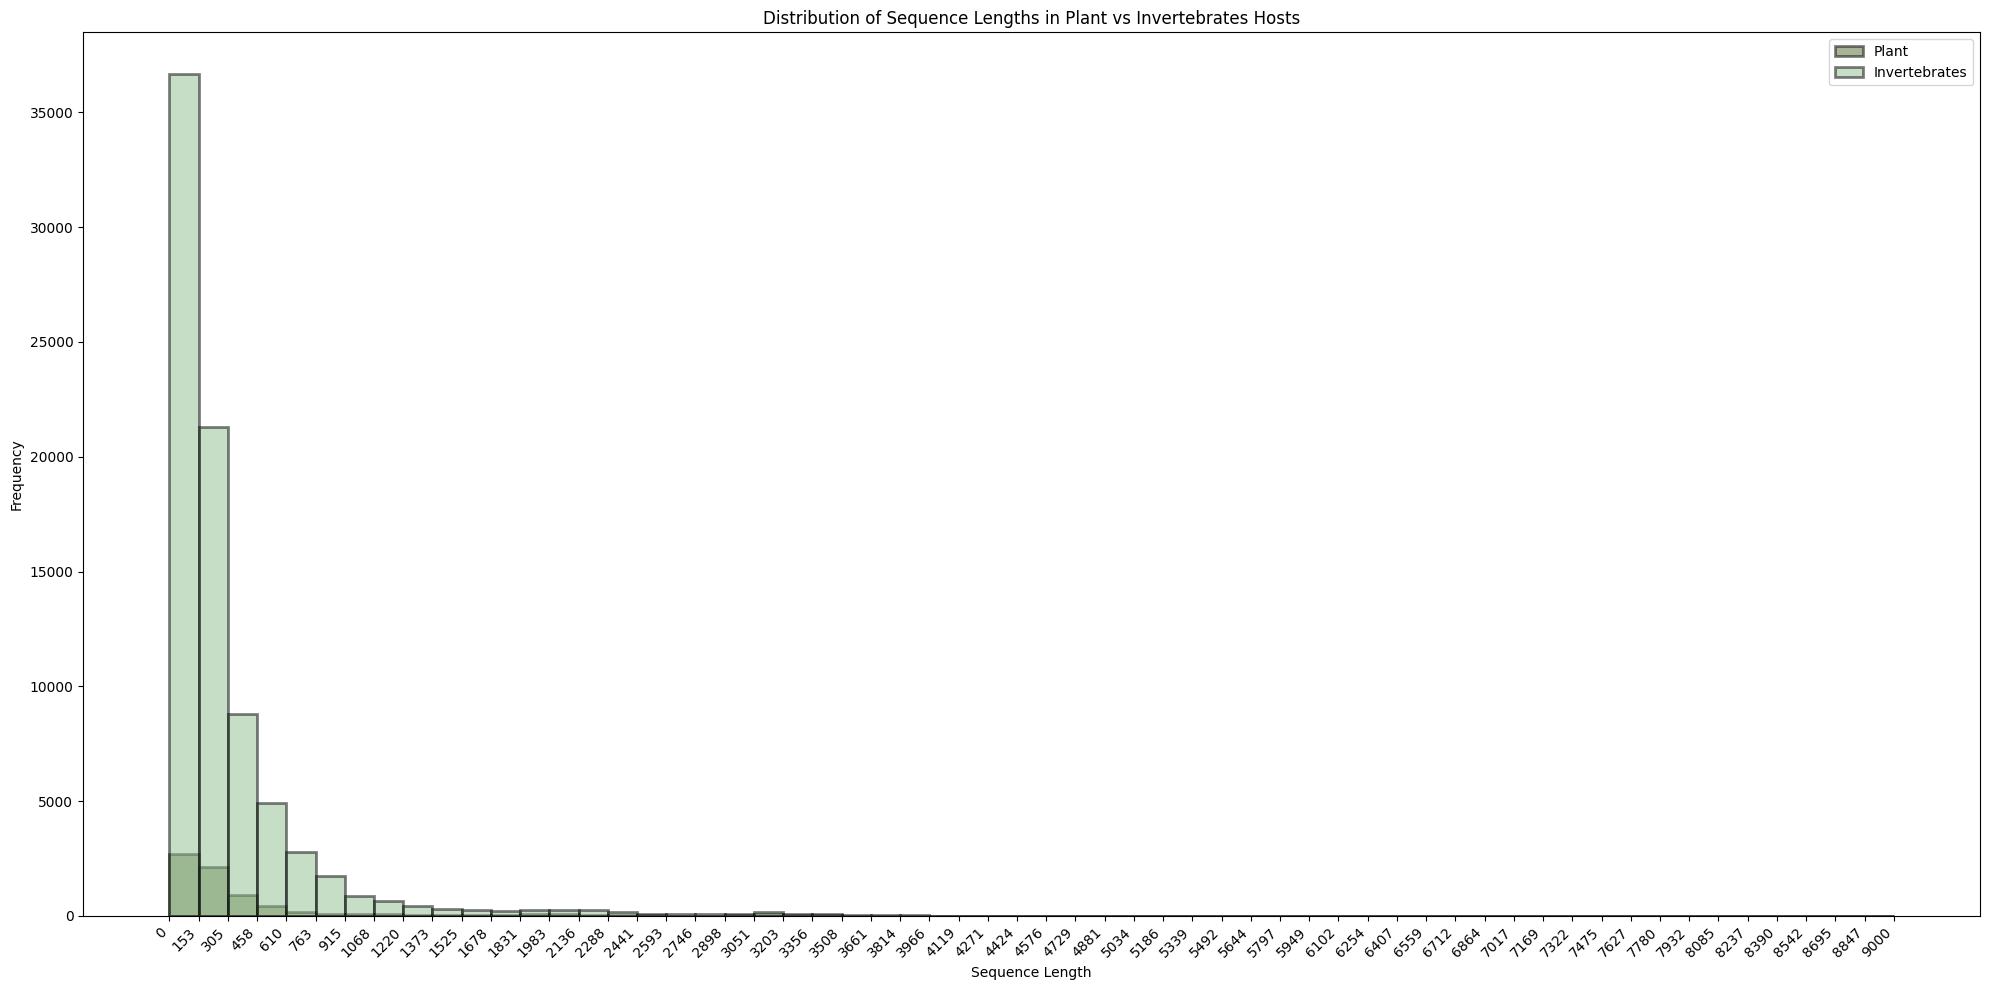

In [11]:
# Plot overlapped histograms
bins = np.linspace(0, 9000, 60)
seq_len_inv = [len(seq) for seq in inv_df['seq']]
plt.figure(figsize=(20, 10))
plt.hist(seq_len_plant, bins=bins, alpha=0.5, label='Dataset A', color='darkolivegreen', edgecolor='black', linewidth = 2)
plt.hist(seq_len_inv, bins=bins, alpha=0.5, label='Dataset B', color='darkseagreen', edgecolor='black', linewidth = 2)

# Add labels and legend
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Sequence Lengths in Plant vs Invertebrates Hosts')
plt.legend(['Plant', 'Invertebrates'])
plt.xticks(bins, ha='right', rotation=45)
plt.tight_layout()
plt.show()

### Virus Distributions

In [12]:
ncbi = NCBITaxa()

def get_virus_info(taxid):
    name = ncbi.get_taxid_translator([int(taxid)]).get(int(taxid), 'Unknown')
    lineage = ncbi.get_lineage(int(taxid))
    names = ncbi.get_taxid_translator(lineage)
    ranks = ncbi.get_rank(lineage)

    species = ''
    genus = ''
    family = ''

    try:
        for tid in lineage:
            rank = ranks.get(tid, '')
            name = names.get(tid, '')
            if rank == 'species':
                species = name
            elif rank == 'genus':
                genus = name
            elif rank == 'family':
                family = name
            elif rank == 'order':
                order = name
        return pd.Series([species if species else 'Unknown', genus if genus else 'Unknown', family if family else 'Unknown', order if order else 'Unknown'])
    except:
        return pd.Series(['Unknown', 'Unknown', 'Unknown', 'Unknown'])

df[['virus_species', 'virus_genus', 'virus_family', 'virus_order']] = df['tax_id'].apply(get_virus_info)

Text(0.5, 1.0, "Plant Virus' Family Distribution")

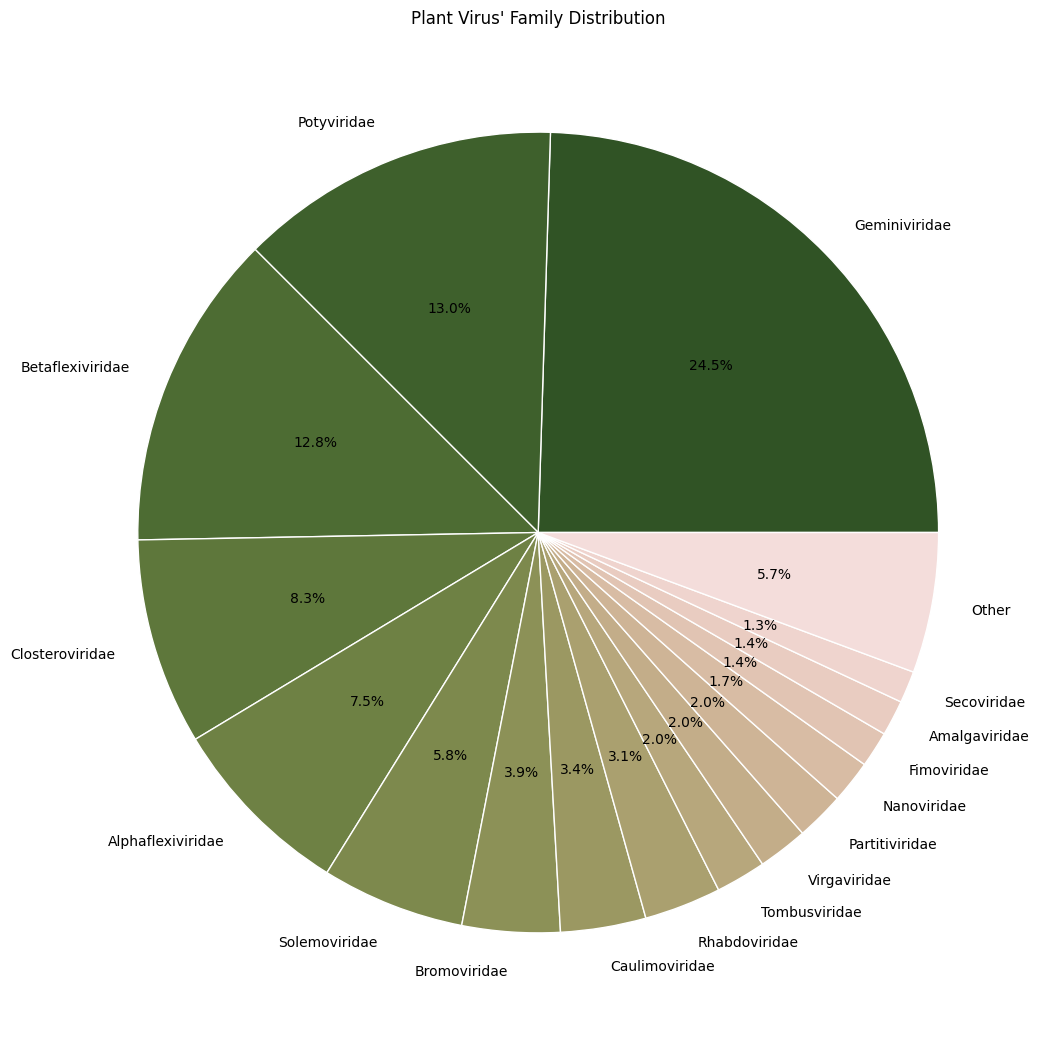

In [13]:
# count frequencies of virus families
family_counts = df['virus_family'].value_counts()
family_counts = family_counts.drop('Unknown', errors='ignore')
total = family_counts.sum()

# define a threshold value and remove viruses that fall below
threshold = 0.01 # 1%
family_counts_filtered = family_counts[family_counts / total >= threshold]
other_count = family_counts[family_counts / total < threshold].sum()

# add data to a new column titled "Other"
if other_count > 0:
    family_counts_filtered['Other'] = other_count

# configure and plot the pie chart figure
colors = sns.cubehelix_palette(start=2, rot=-.4, gamma=.7, n_colors=len(family_counts_filtered), reverse=True)

family_counts_filtered.plot(
    kind='pie',
    figsize=(13, 13),
    colors=colors,
    wedgeprops={"linewidth": 1, "edgecolor": "white"},
    autopct='%1.1f%%',
    ylabel='',
    legend=False)
plt.title("Plant Virus' Family Distribution")

Text(0.5, 1.0, "Plant Virus' Order Distribution")

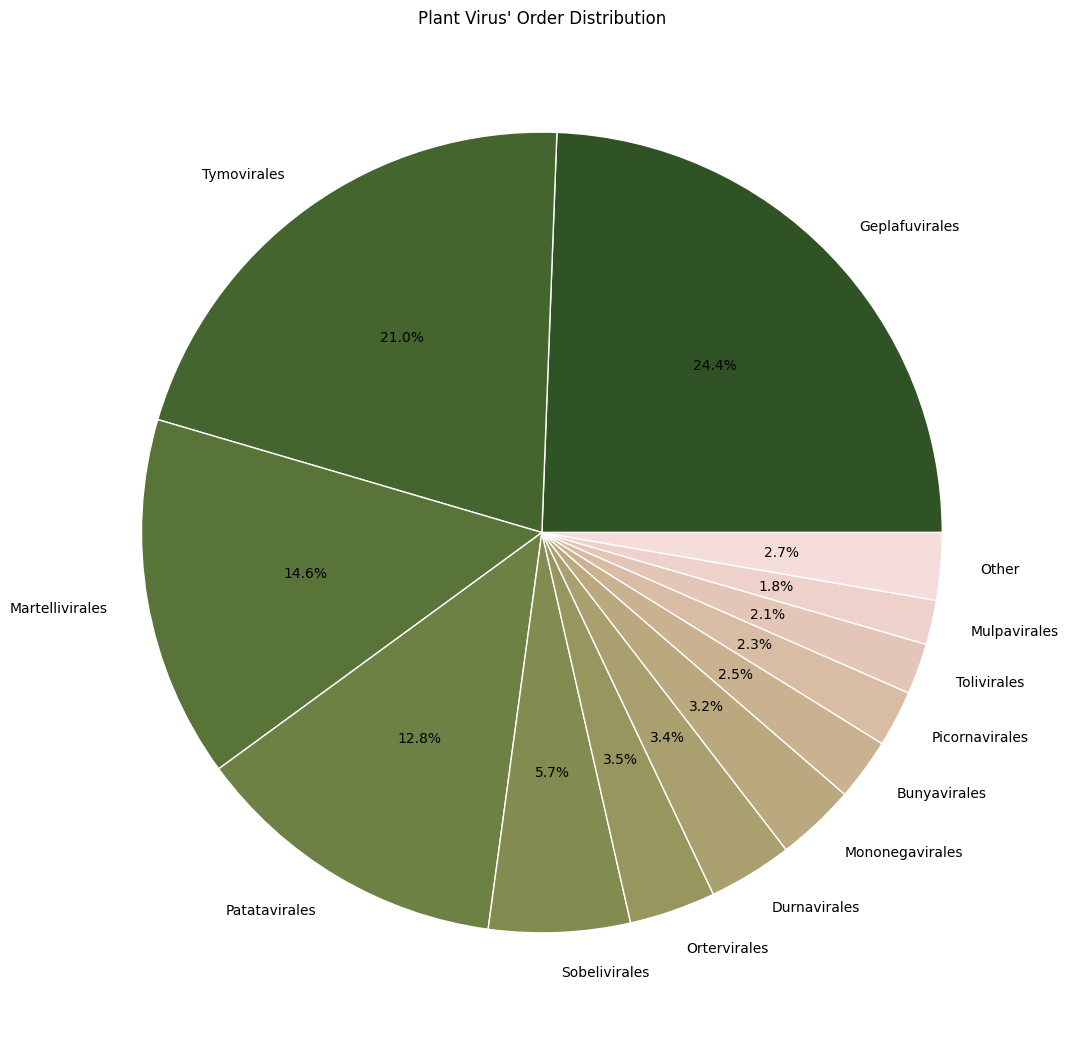

In [14]:
# count frequencies of virus order's
order_counts = df['virus_order'].value_counts()
order_counts = order_counts.drop('Unknown', errors='ignore')
total = order_counts.sum()

# define a threshold value and remove viruses that fall below
threshold = 0.01 # 1%
order_counts_filtered = order_counts[order_counts / total >= threshold]
other_count = order_counts[order_counts / total < threshold].sum()

# add data to a new column titled "Other"
if other_count > 0:
    order_counts_filtered['Other'] = other_count

# configure and plot the pie chart figure
colors = sns.cubehelix_palette(start=2, rot=-.4, gamma=.7, n_colors=len(order_counts_filtered), reverse=True)

order_counts_filtered.plot(
    kind='pie',
    figsize=(13, 13),
    colors=colors,
    wedgeprops={"linewidth": 1, "edgecolor": "white"},
    autopct='%1.1f%%',
    ylabel='',
    legend=False)
plt.title("Plant Virus' Order Distribution")

Text(0.5, 1.0, "Plant Virus' Genus Distribution")

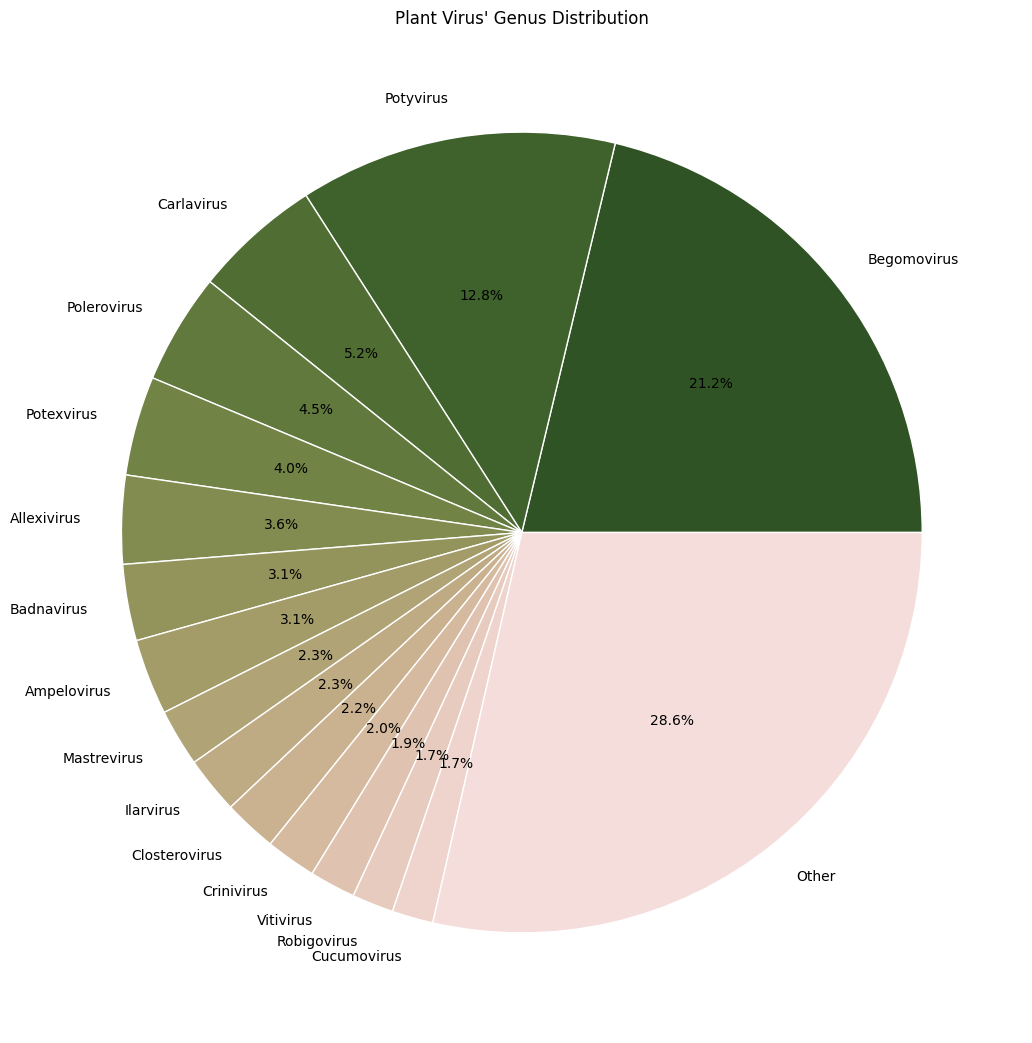

In [15]:
# count frequencies of virus order's
genus_counts = df['virus_genus'].value_counts()
genus_counts = genus_counts.drop('Unknown', errors='ignore')
total = genus_counts.sum()

# define a threshold value and remove viruses that fall below
threshold = 0.016 # 1.7%
genus_counts_filtered = genus_counts[genus_counts / total >= threshold]
other_count = genus_counts[genus_counts / total < threshold].sum()

# add data to a new column titled "Other"
if other_count > 0:
    genus_counts_filtered['Other'] = other_count

# configure and plot the pie chart figure
colors = sns.cubehelix_palette(start=2, rot=-.4, gamma=.7, n_colors=len(genus_counts_filtered), reverse=True)

genus_counts_filtered.plot(
    kind='pie',
    figsize=(13, 13),
    colors=colors,
    wedgeprops={"linewidth": 1, "edgecolor": "white"},
    autopct='%1.1f%%',
    ylabel='',
    legend=False)
plt.title("Plant Virus' Genus Distribution")

### Virus Host Counts

In [31]:
n = df.shape[0]
host_count_data, host_label_data, host_prevalence_data = get_data_for_pie_chart(df, col_name="virus_host_name", n=n, threshold=.01)
others_hosts = []
for k,v in host_count_data.items():
    if (v/n*100) <= 1.5:
        others_hosts.append(k)
        
df["virus_host_name_mod"] = df["virus_host_name"].apply(lambda x: x if x not in others_hosts else f"Others ({len(others_hosts)} hosts)")

host_count_data, host_label_data, host_prevalence_data = get_data_for_pie_chart(df[~df["virus_host_name"].isin(others_hosts)], col_name="virus_host_name_mod", n=n, threshold=0.01)

In [32]:
host_prevalence_data

{'Allium sativum': 'Allium sativum (4.62%)',
 'Vitis vinifera': 'Vitis vinifera (3.96%)',
 'Solanum lycopersicum': 'Solanum lycopersicum (3.81%)',
 'Prunus avium': 'Prunus avium (2.15%)',
 'Solanum tuberosum': 'Solanum tuberosum (1.94%)',
 'Capsicum annuum': 'Capsicum annuum (1.86%)',
 'Manihot esculenta': 'Manihot esculenta (1.79%)',
 'Carica papaya': 'Carica papaya (1.64%)',
 'Phaseolus vulgaris': 'Phaseolus vulgaris (1.54%)'}

In [33]:
n_others = df[df['virus_host_name'].isin(others_hosts)].shape[0]
host_prevalence_data["Hosts with prevalence <= 1.5%"] = f"Hosts with prevalence <= 0.15%\n{len(others_hosts)} hosts ({n_others/n*100:.2f}%)"

In [34]:
host_prevalence_data

{'Allium sativum': 'Allium sativum (4.62%)',
 'Vitis vinifera': 'Vitis vinifera (3.96%)',
 'Solanum lycopersicum': 'Solanum lycopersicum (3.81%)',
 'Prunus avium': 'Prunus avium (2.15%)',
 'Solanum tuberosum': 'Solanum tuberosum (1.94%)',
 'Capsicum annuum': 'Capsicum annuum (1.86%)',
 'Manihot esculenta': 'Manihot esculenta (1.79%)',
 'Carica papaya': 'Carica papaya (1.64%)',
 'Phaseolus vulgaris': 'Phaseolus vulgaris (1.54%)',
 'Hosts with prevalence <= 1.5%': 'Hosts with prevalence <= 0.15%\n902 hosts (76.70%)'}

In [35]:
host_count_data

{'Allium sativum': 336,
 'Vitis vinifera': 288,
 'Solanum lycopersicum': 277,
 'Prunus avium': 156,
 'Solanum tuberosum': 141,
 'Capsicum annuum': 135,
 'Manihot esculenta': 130,
 'Carica papaya': 119,
 'Phaseolus vulgaris': 112}

19.834710657596588
17.001180350780487
16.35182946920395
9.208972752094269
8.323494344949722
7.9693034291267395
7.674144208431244
7.024793326854706
6.611569970846176


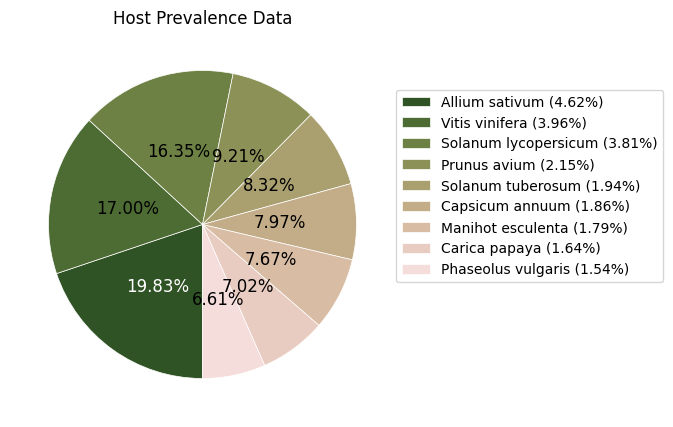

In [37]:
fig, ax = plt.subplots(figsize=(9, 5))

def get_label(pct, threshold):
    print(pct)
    if pct <= threshold:
        return ""
    else:
        return f"{pct:.2f}%"

threshold=1.0
wedges, texts, autotexts = ax.pie(host_count_data.values(), autopct=lambda pct: get_label(pct, threshold=3), 
                                  pctdistance=.5, labeldistance=.7, counterclock=False, startangle=-90,
                                  colors=sns.cubehelix_palette(start=2, rot=-.4, gamma=.7, n_colors=len(host_count_data), reverse=True), 
                                  wedgeprops={"linewidth": .5, "edgecolor": "white"})

ax.legend(wedges, host_prevalence_data.values(),
          title="",
          loc="center",
          bbox_to_anchor=(1.35, .6), ncol=1)
plt.setp(autotexts, size=12, color="black")
plt.setp(autotexts[0], size=12, color="white")
plt.setp(autotexts[-1], size=12, color="black")
plt.title('Host Prevalence Data')
#plt.savefig(os.path.join(os.getcwd(), "..", "..", "..", "..", "output/visualization/temp_new/noniv_hosts_pie.pdf"), bbox_inches="tight", dpi=600)
plt.show()

### Observations & Conclusions